In [1]:
from __future__ import division
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')


In [161]:
ch = open('DJCM.txt','r')
for i in ch:
    print i 

1111001001010010100101110

1111100010000101001011100

0111110000100001000001111

1000111011101011000110001

0101010101010101010101010

0111010000011100000101110



In [65]:
X = np.zeros((6,25))

In [66]:
X[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [202]:
ch = open('DJCM.txt','r')
list = []
for i in ch:
    list.append(i)

In [282]:
for i in range(len(list)):
    for j in range(25):
        X[i][j] = int(list[i][j])

In [283]:
X = 2*(X-0.5)

In [284]:
def display(X):
    plt.imshow(X.reshape((5,5)))

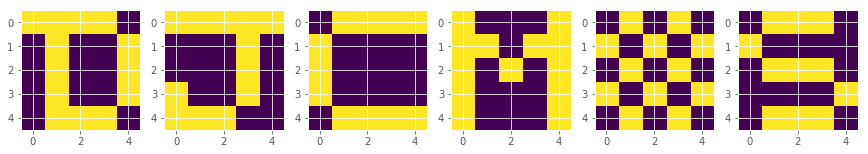

In [285]:
fig = plt.figure(figsize=(15,4))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1)
    display(X[i])

In [112]:
w = np.zeros((25,25))

In [257]:
for i in range(25):
    for j in range(25):
        for k in range(4):
            w[i,j] += X[k][i]*X[k][j]
            G.add_edge(i,j, weight = w[i,j])

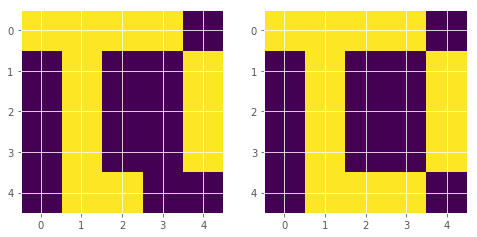

In [232]:
fig = plt.figure(figsize=(8,4))
fig.add_subplot(1, 2, 1)
testX = X[0]
testX[23] = -testX[23]
display(testX)
fig.add_subplot(1, 2, 2)
a = np.dot(w,testX)
x = np.tanh(a)
display(x)

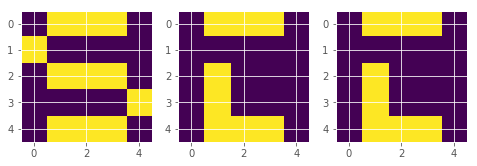

In [237]:
fig = plt.figure(figsize=(8,4))
fig.add_subplot(1, 3, 1)
display(X[5])
fig.add_subplot(1, 3, 2)
a = np.dot(w,X[5])
x = np.tanh(a)
display(x)
fig.add_subplot(1, 3, 3)
a = np.dot(w,np.dot(w,np.dot(w,np.dot(w,X[5]))))
x = np.tanh(a)
display(x)

brain damage 1/25. No functional problem for dcjm

then 6/25, 24 % loss

In [195]:
dw = w
for i in range(15):
    for j in range(10):
        dw[i+3,j+5] = 0

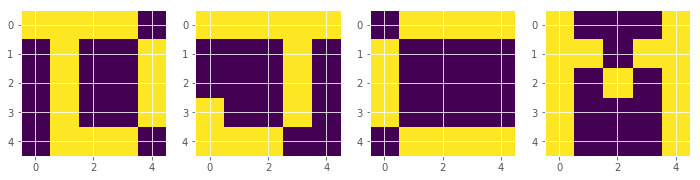

In [239]:
fig = plt.figure(figsize=(1,4))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1)
    a = np.dot(dw,X[i])
    x = np.tanh(a)
    display(x)

If the pattern is over recorded

In [209]:
wo = np.zeros((25,25))
for i in range(25):
    for j in range(25):
        for k in range(6):
            wo[i,j] += X[k][i]*X[k][j]

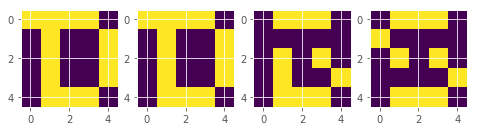

In [286]:
fig = plt.figure(figsize=(8,4))
fig.add_subplot(1, 4, 1)
display(X[0])
fig.add_subplot(1, 4, 2)
a = np.dot(wo,X[0])
x = np.tanh(a)
display(x)
fig.add_subplot(1, 4, 3)
a = np.dot(wo,np.dot(wo,X[0]))
x = np.tanh(a)
display(x)
fig.add_subplot(1, 4, 4)
a = np.dot(wo,np.dot(wo,np.dot(wo,np.dot(wo,X[0]))))
x = np.tanh(a)
display(x)

In [242]:
import networkx as nx

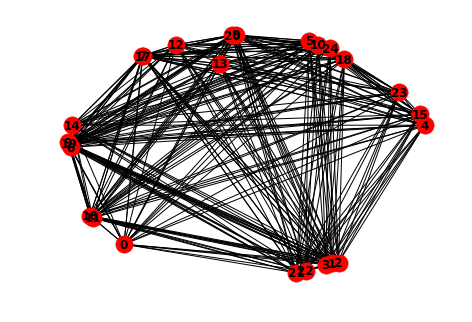

In [292]:
G = nx.Graph()
G.add_nodes_from(range(25))
for i in range(25):
    for j in range(25):
        for k in range(4):
            w[i,j] += X[k][i]*X[k][j]
            G.add_edge(i,j, weight = w[i,j])



nx.draw(G, with_labels =True, font_weight = 'bold')

plt.show()

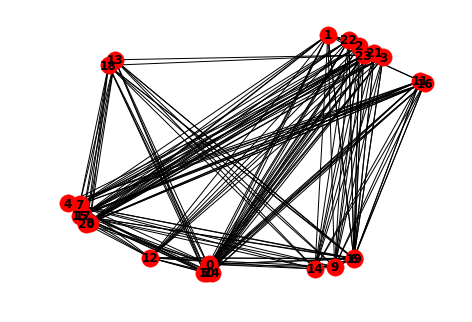

In [293]:
G = nx.Graph()
G.add_nodes_from(range(25))
for i in range(25):
    for j in range(25):
        if w[i,j] != 0:
            G.add_edge(i,j, weight = w[i,j])

nx.draw(G, with_labels =True, font_weight = 'bold')
plt.show()

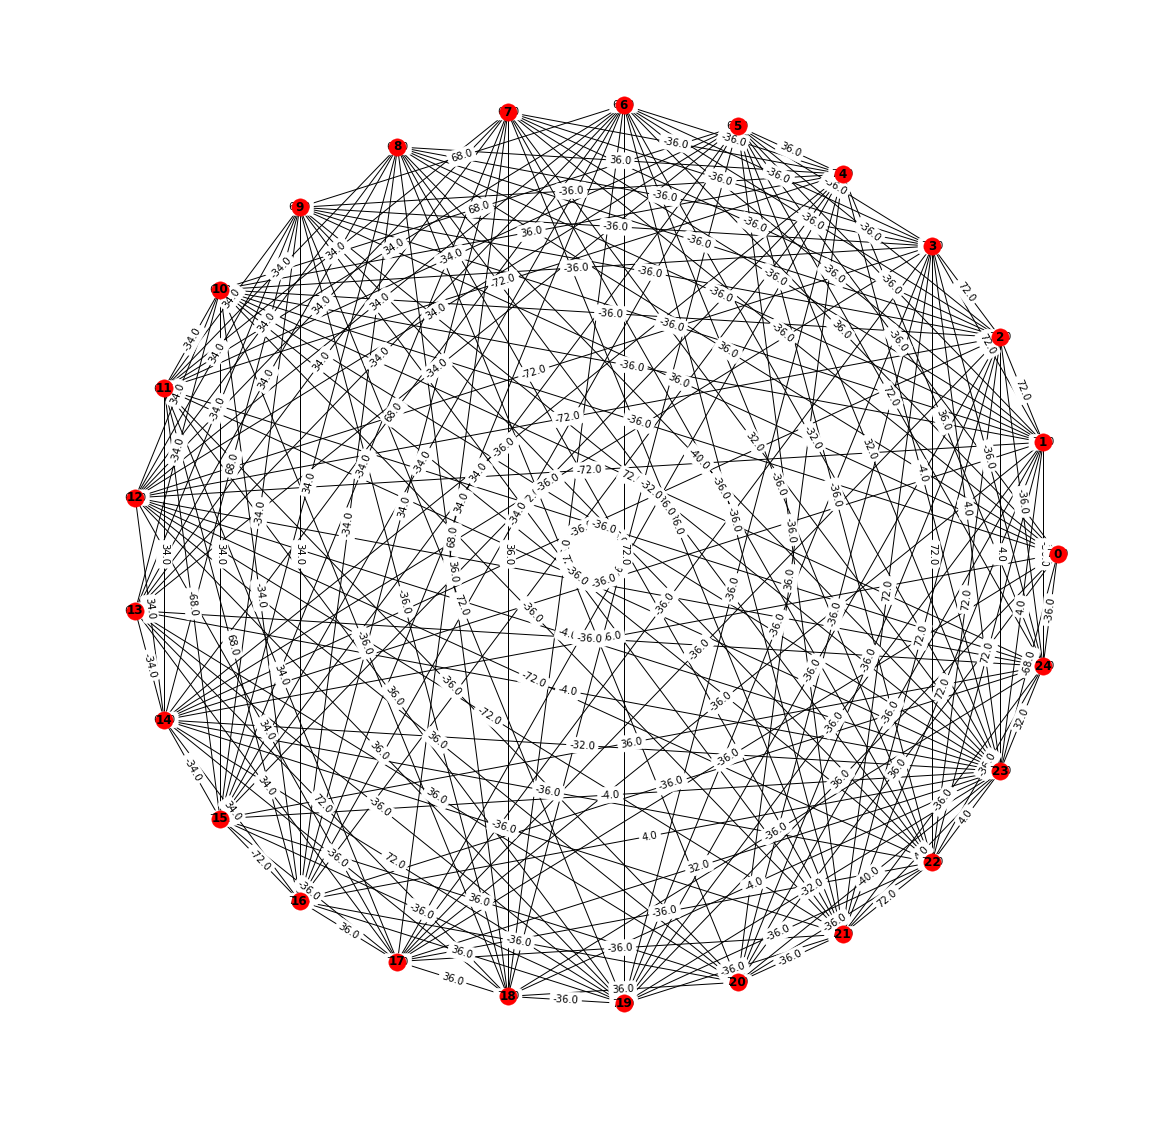

In [295]:
fig = plt.figure(figsize=(20,20))

G = nx.Graph()
G.add_nodes_from(range(25))
for i in range(25):
    for j in range(25):
        if dw[i,j] != 0:
            G.add_edge(i,j, weight = dw[i,j])
pos=nx.circular_layout(G)           
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)


nx.draw(G, pos, with_labels =True, font_weight = 'bold')




plt.show()